In [1]:
import torch
from helper import *

In [35]:
def linear_q_symmetric_per_group(tensor, group_size, dtype=torch.int8):
    t_shape = tensor.shape
    assert tensor.shape[1] % group_size == 0
    assert tensor.dim() == 2
    tensor = tensor.view(-1, group_size)
    print(tensor.shape)
    quantized_tensor, scale = linear_q_symmetric_per_channel(tensor, dim=0)
    quantized_tensor = quantized_tensor.view(t_shape)
    return quantized_tensor, scale

In [36]:
def linear_dequantization_per_group(quantized_tensor, group_size, scale):
    q_shape = quantized_tensor.shape
    quantized_tensor = quantized_tensor.view(-1, group_size)
    dequantized_tensor = linear_dequantization(quantized_tensor, scale, zero_point=0)
    dequantized_tensor = dequantized_tensor.view(q_shape)
    return dequantized_tensor

In [37]:
test_tensor = torch.randn((6, 6))

In [38]:
group_size = 3

In [39]:
quantized_tensor, scale = linear_q_symmetric_per_group(test_tensor, group_size)

torch.Size([12, 3])


In [40]:
scale.shape

torch.Size([12, 1])

In [31]:
quantized_tensor.shape

torch.Size([6, 6])

In [32]:
dequantized_tensor = linear_dequantization_per_group(quantized_tensor, group_size, scale)

In [33]:
dequantized_tensor

tensor([[ 0.6674, -0.5045, -0.2732, -0.1537, -0.6610, -0.9762],
        [ 0.9181, -0.6015,  1.0052, -0.5076, -1.2893, -0.6700],
        [-0.6741,  0.8826, -0.7505, -0.1932,  0.3557, -0.3165],
        [-0.4481,  0.5771, -0.8622, -0.1426, -1.3934, -0.5596],
        [-0.3863, -0.3499, -0.9257, -1.9283,  0.2277, -0.2581],
        [-1.2803,  0.5847,  0.4738, -0.0700,  0.4590, -0.4940]])

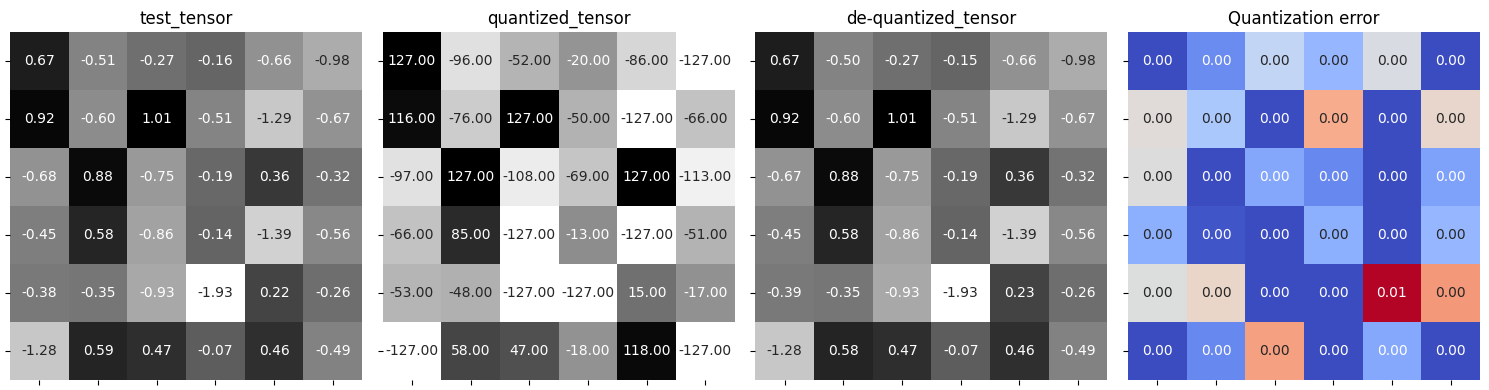

In [34]:
plot_quantization_error(test_tensor, quantized_tensor, dequantized_tensor)